In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\saher\Desktop\workshop\real_project\flags_insertion\Argentina.jpg"
image = cv2.imread(image_path)

# Define the pixelation scale (adjusted to a smaller value)
scale = 35  # Smaller scale results in better pixelation

# Get the dimensions of the image
height, width = image.shape[:2]

# Resize the image to a smaller size
small_image = cv2.resize(image, (width // scale, height // scale), interpolation=cv2.INTER_LINEAR)

# Resize the small image back to the original size
pixelated_image = cv2.resize(small_image, (width, height), interpolation=cv2.INTER_NEAREST)

final_image = cv2.resize(image, (30, 30), interpolation=cv2.INTER_LINEAR)

# Convert the image from BGR to RGB for displaying with matplotlib
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

print(final_image_rgb.shape)

(30, 30, 3)


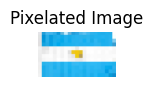

In [12]:
# Convert the pixelated image to RGB for displaying with matplotlib
pixelated_image_rgb = cv2.cvtColor(pixelated_image, cv2.COLOR_BGR2RGB)

# Display the pixelated image
plt.figure(figsize = (1,1))
plt.imshow(pixelated_image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title("Pixelated Image")
plt.show()

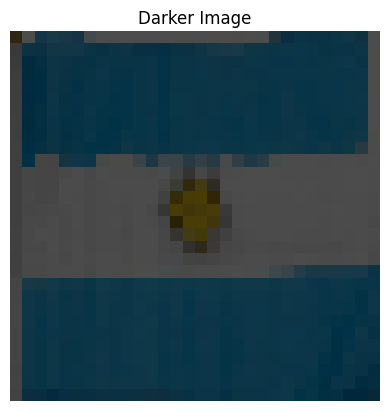

In [3]:
import numpy as np

# Reduce brightness by scaling pixel values
brightness_factor = 0.3  # Reduce brightness to 50%
darker_image = np.clip(final_image * brightness_factor, 0, 255).astype(np.uint8)

# Convert the darker image to RGB for displaying with matplotlib
darker_image_rgb = cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB)

# Display the darker image
cv2.imshow("Background Image", darker_image_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.imshow(darker_image_rgb)
plt.axis('off')  # Hide axes for better visualization
plt.title("Darker Image")
plt.show()

In [ ]:
import cv2
import random

hieght_scaling_values = [20 ,25 ,30 ,35 ,40]
brightness_factors = [1 , 0.9 , 0.8 ,0.7 , 0.6 , 0.5]
back_ground_path = r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p6.jpg"

back_ground = cv2.imread(back_ground_path)

print(back_ground[])

height , width = back_ground.shape[:2]
print(height , width)

# Display the background image
cv2.imshow("Background Image", back_ground)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[118 108  91]
 [118 108  91]
 [119 109  92]
 ...
 [175 143 107]
 [176 144 108]
 [176 144 108]]
720 1280


In [7]:
back_ground [0]

array([[119, 109,  92],
       [119, 109,  92],
       [119, 109,  92],
       ...,
       [174, 142, 106],
       [174, 142, 106],
       [175, 143, 107]], dtype=uint8)

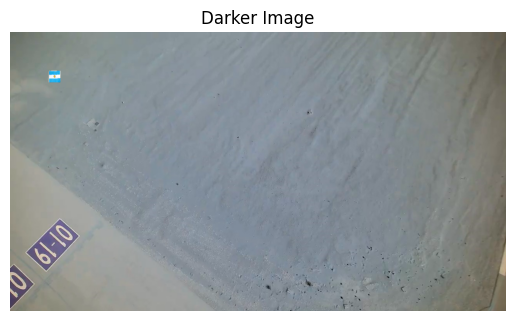

In [8]:
back_ground_path = r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p1.jpg"
back_ground = cv2.imread(back_ground_path)
back_ground[ 100 : (100 + final_image_rgb.shape[1]) ,  100 : (100 + final_image_rgb.shape[0])] = final_image_rgb

# Define the region of interest (ROI) on the background
roi = back_ground[100:(100 + final_image_rgb.shape[0]), 100:(100 + final_image_rgb.shape[1])]

# Define the alpha blending factor (transparency)
alpha = 0.7  # 70% of the final image, 30% of the background

# Blend the images
blended = cv2.addWeighted(final_image_rgb, alpha, roi, 1 - alpha, 0)

# Place the blended image back into the background
back_ground[100:(100 + final_image_rgb.shape[0]), 100:(100 + final_image_rgb.shape[1])] = blended

# Display the result
plt.imshow(back_ground)
plt.axis('off')  # Hide axes for better visualization
plt.title("Darker Image")
plt.show()

In [4]:
import os 

folder_path = r"C:\Users\saher\Desktop\workshop\real_project\flags_insertion"

files = [os.path.join(folder_path , f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path , f))]

len(files)

19

In [5]:
files[0].split('\\')[-1].split('.')[0]

'American'

# the pose

In [13]:
import cv2
import os
import random
import numpy as np

random.seed(42)

folder_path = r"C:\Users\saher\Desktop\workshop\real_project\flags_insertion"
flags = [os.path.join(folder_path , f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path , f))]
Num_flags = len(flags)

hieght_scaling_values = [10 , 15 , 20 ,25 ,30 ,35]
brightness_factors = [1 , 0.8  , 0.6 , 0.5 , 0.4 , 0.3]
final_shape = [ 25 , 30 , 35 , 40 , 45]
back_grounds_path = [r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p1.jpg" , r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p2.jpg" ,r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p6.jpg"]

back_ground = cv2.imread(back_grounds_path[1])
height, width = back_ground.shape[:2]


edited_flags = r"C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background"
if not os.path.exists(edited_flags):
    os.makedirs(edited_flags)


for i in range( 0, height - 40 , 120):
    for j in range(0 , width-40 , 200):
        for k in range(3): 
            for file in range(Num_flags):
                # read image and scaling
                image = cv2.imread(flags[file])
                flage_h, flage_w = image.shape[:2]
                scale = random.choice(hieght_scaling_values)
                small_image = cv2.resize(image, (flage_w // scale, flage_h // scale), interpolation=cv2.INTER_LINEAR)
                pixelated_image = cv2.resize(small_image, (flage_w, flage_h), interpolation=cv2.INTER_NEAREST)
                final_w = random.choice(final_shape)
                final_h = random.choice(final_shape)
                final_image = cv2.resize(image, (final_w, final_h), interpolation=cv2.INTER_LINEAR)

                # brightness
                brightness_factor = random.choice(brightness_factors)  
                darker_image = np.clip(final_image * brightness_factor, 0, 255).astype(np.uint8)

                #insert flage into back ground and blending
                back_ground = cv2.imread(random.choice(back_grounds_path)).copy()
                roi = back_ground[i:(i + final_h), j:(j + final_w)]
                alpha = 0.7  
                blended = cv2.addWeighted(darker_image, alpha, roi, 1 - alpha, 0)
                back_ground[i:(i + final_h), j:(j + final_w)] = blended

                # Save the edited image
                filename = flags[file].split('\\')[-1].split('.')[0]
                output_path = os.path.join(edited_flags, f"{filename}_{i}_{j}_{k}_{file}.jpg")
                cv2.imwrite(output_path, back_ground)
                print(f"Saved: [{i*j*k*file}] {output_path}")


Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\American_0_0_0_0.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Argentina_0_0_0_1.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\British_0_0_0_2.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Bulgaria_0_0_0_3.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\China_0_0_0_4.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Croatia_0_0_0_5.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Denmark_0_0_0_6.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Egypt_0_0_0_7.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\England_0_0_0_8.jpg
Saved: [0] C:\Users\saher\Desktop\workshop\real_project

In [12]:
import cv2
import os
import random
import numpy as np

# Folder paths
folder_path = r"C:\Users\saher\Desktop\workshop\real_project\flags_insertion"
back_grounds_path = [
    r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p1.jpg",
    r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p2.jpg",
    r"C:\Users\saher\Desktop\workshop\real_project\back_ground\p6.jpg"
]
edited_flags = r"C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background"

# Ensure the output folder exists
if not os.path.exists(edited_flags):
    os.makedirs(edited_flags)

# Get the list of flag images
flags = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
Num_flags = len(flags)

# Scaling and brightness factors
hieght_scaling_values = [15, 20, 25, 30, 35]
brightness_factors = [1, 0.9, 0.8, 0.7, 0.6, 0.5]

# Process each background
for bg_path in back_grounds_path:
    back_ground = cv2.imread(bg_path)
    if back_ground is None:
        print(f"Error: Could not load background image {bg_path}")
        continue

    height, width = back_ground.shape[:2]  # Get dimensions of the background

    for i in range(0, height - 40, 80):
        for j in range(0, width - 40, 130):
            for k in range(3):
                for f in range(Num_flags):
                    # Read and resize the flag image
                    image = cv2.imread(flags[f])
                    if image is None:
                        print(f"Error: Could not load flag image {flags[f]}")
                        continue

                    scale = random.choice(hieght_scaling_values)
                    small_image = cv2.resize(image, (image.shape[1] // scale, image.shape[0] // scale), interpolation=cv2.INTER_LINEAR)
                    final_image = cv2.resize(small_image, (35, 35), interpolation=cv2.INTER_LINEAR)

                    # Insert flag into the background
                    roi = back_ground[i:(i + final_image.shape[0]), j:(j + final_image.shape[1])]
                    if roi.shape[:2] != final_image.shape[:2]:
                        print(f"Skipping position ({i}, {j}) due to size mismatch.")
                        continue

                    alpha = 0.7  # Blending factor
                    blended = cv2.addWeighted(final_image, alpha, roi, 1 - alpha, 0)
                    back_ground[i:(i + final_image.shape[0]), j:(j + final_image.shape[1])] = blended

                    # Adjust brightness
                    brightness_factor = random.choice(brightness_factors)
                    darker_image = np.clip(back_ground * brightness_factor, 0, 255).astype(np.uint8)

                    # Save the edited image
                    output_path = os.path.join(
                        edited_flags,
                        f"{os.path.basename(flags[f]).split('.')[0]}_{i}_{j}_{k}_{f}.jpg"
                    )
                    cv2.imwrite(output_path, darker_image)
                    print(f"Saved: {output_path}")

Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\American_0_0_0_0.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Argentina_0_0_0_1.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\British_0_0_0_2.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Bulgaria_0_0_0_3.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\China_0_0_0_4.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Croatia_0_0_0_5.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Denmark_0_0_0_6.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Egypt_0_0_0_7.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\England_0_0_0_8.jpg
Saved: C:\Users\saher\Desktop\workshop\real_project\inserted_flags_in_background\Ghana_0_0_

In [40]:
cv2.imshow("22",back_ground[:100 , :100])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
6 % 3

0

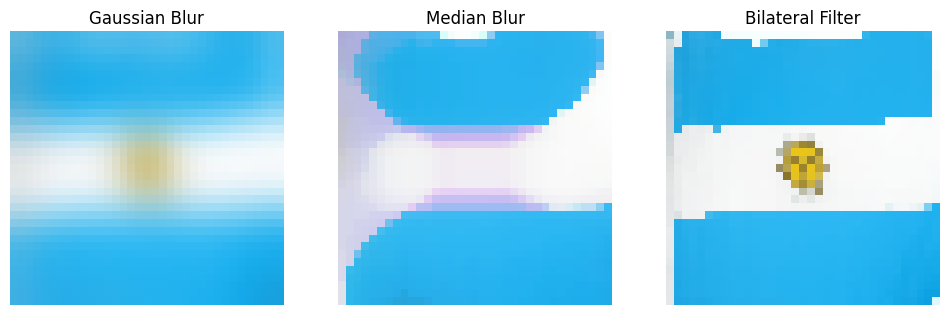

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(final_image_rgb, (15, 15), 0)

# Apply Median Blur
median_blurred_image = cv2.medianBlur(final_image_rgb, 15)

# Apply Bilateral Filter
bilateral_filtered_image = cv2.bilateralFilter(final_image_rgb, 15, 75, 75)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(blurred_image)
plt.axis('off')
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(median_blurred_image)
plt.axis('off')
plt.title("Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(bilateral_filtered_image)
plt.axis('off')
plt.title("Bilateral Filter")

plt.show()